In [16]:
import numpy as np
import matplotlib.pyplot as plt

Importing fenics data and getfem data to be compared


In [21]:
# Read FEniCS data
fenics = np.loadtxt('results_fenics/cd_cl_time_series_fenics.txt')
time_fenics = fenics[:, 0]
Cd_fenics = fenics[:, 1]
Cl_fenics = fenics[:, 2]
p_diff_fenics = fenics[:, 4]

# Define GetFEM simulations as a list of dictionaries
getfem_simulations = [
    {'file': r'results_cylinder_channel_getfem_part/force_coefficients_channel.txt', 'name': 'GetFEM part Q2-Q1'},
    #{'file': r'results_cylinder_channel_getfem_part_Q3_Q1/force_coefficients_channel.txt', 'name': 'GetFEM part Q3-Q1'},
    {'file': r'results_cylinder_channel_getfem_mono/force_coefficients_channel.txt', 'name': 'GetFEM mono Q2-Q1'},
    #{'file': r'results_stokes_time_variant_26_01/force_coefficients_channel.txt', 'name': 'GetFEM stokes'},

]


Cl, Cd and DeltaP plots

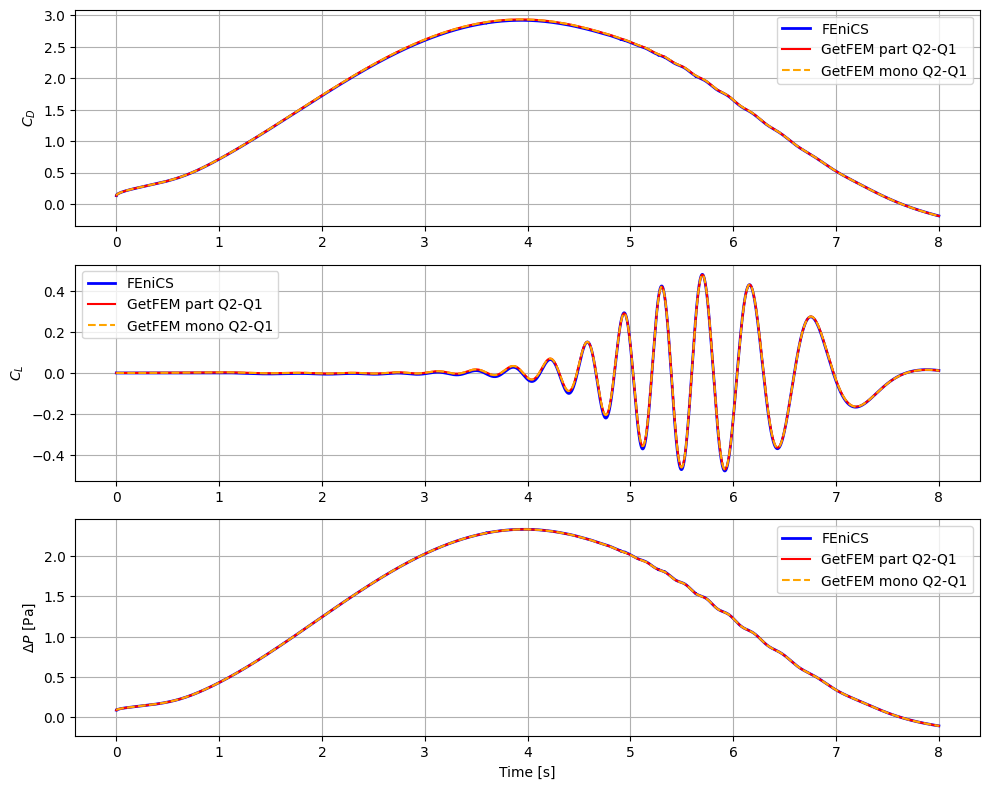

In [22]:
# Color palette for different simulations
colors = ['r', 'orange', 'purple', 'brown', 'pink', 'gray']
linestyles = ['-', '--', '-.', ':']

# First figure: Comparison plots
fig1, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

# Plot FEniCS data
ax1.plot(time_fenics, Cd_fenics, 'b-', label='FEniCS', linewidth=2)
ax2.plot(time_fenics, Cl_fenics, 'b-', label='FEniCS', linewidth=2)
ax3.plot(time_fenics, p_diff_fenics, 'b-', label='FEniCS', linewidth=2)
# Plot all GetFEM simulations
for i, sim in enumerate(getfem_simulations):
    getfem = np.loadtxt(sim['file'])
    time_getfem = getfem[:, 0]
    Cd_getfem = getfem[:, 1]
    Cl_getfem = getfem[:, 2]
    p_diff_getfem = getfem[:, 3]
    
    color = colors[i % len(colors)]
    linestyle = linestyles[i % len(linestyles)]
    
    ax1.plot(time_getfem, Cd_getfem, color=color, linestyle=linestyle, label=sim['name'])
    ax2.plot(time_getfem, Cl_getfem, color=color, linestyle=linestyle, label=sim['name'])
    ax3.plot(time_getfem, p_diff_getfem, color=color, linestyle=linestyle, label=sim['name'])
ax1.set_ylabel('$C_D$')
ax1.legend()
ax1.grid(True)

ax2.set_ylabel('$C_L$')
ax2.legend()
ax2.grid(True)

ax3.set_xlabel('Time [s]')
ax3.set_ylabel('$\Delta P$ [Pa]')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()

absolute difference between fenics Cl, Cd and delta and getfem

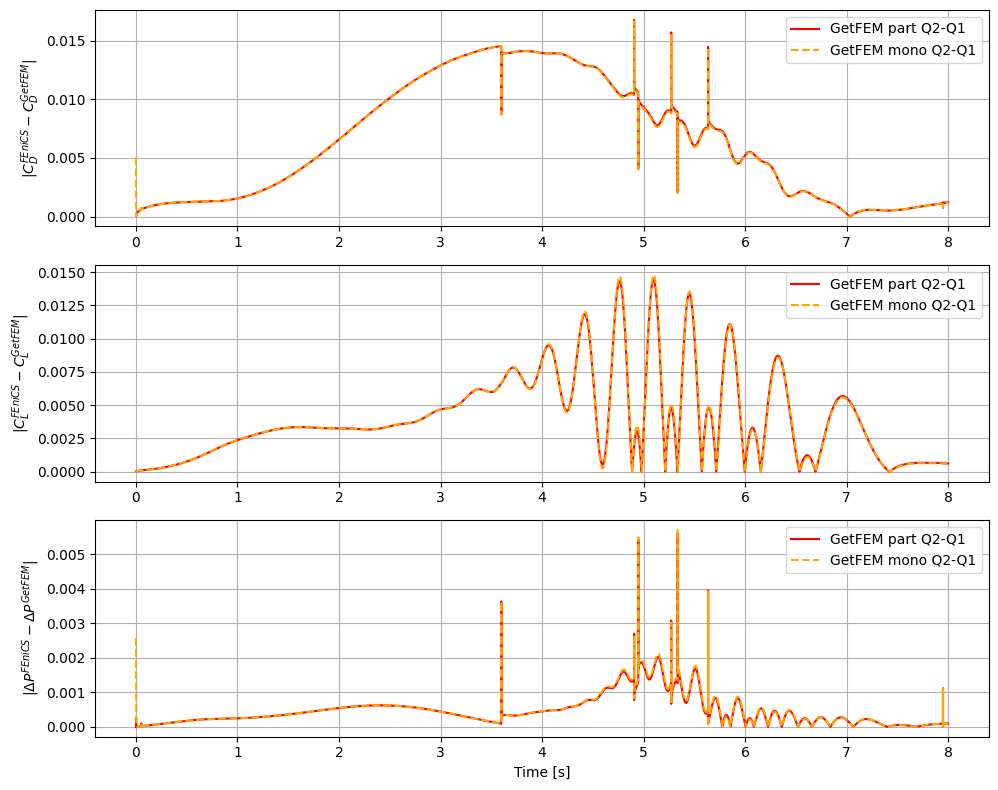

In [23]:
fig2, (ax4, ax5, ax6) = plt.subplots(3, 1, figsize=(10, 8))

# Plot differences for each GetFEM simulation
for i, sim in enumerate(getfem_simulations):
    getfem = np.loadtxt(sim['file'])
    time_getfem = getfem[:, 0]
    Cd_getfem = getfem[:, 1]
    Cl_getfem = getfem[:, 2]
    p_diff_getfem = getfem[:, 3]
    
    # Truncate for difference computation
    n = min(len(time_fenics), len(time_getfem))
    Cd_diff = np.abs(Cd_fenics[:n] - Cd_getfem[:n])
    Cl_diff = np.abs(Cl_fenics[:n] - Cl_getfem[:n])
    p_diff_diff = np.abs(p_diff_fenics[:n] - p_diff_getfem[:n])
    time_diff = time_fenics[:n]
    
    color = colors[i % len(colors)]
    linestyle = linestyles[i % len(linestyles)]
    
    ax4.plot(time_diff, Cd_diff, color=color, linestyle=linestyle, label=sim['name'])
    ax5.plot(time_diff, Cl_diff, color=color, linestyle=linestyle, label=sim['name'])
    ax6.plot(time_diff, p_diff_diff, color=color, linestyle=linestyle, label=sim['name'])

ax4.set_ylabel('$|C_D^{FEniCS} - C_D^{GetFEM}|$')
ax4.legend()
ax4.grid(True)

ax5.set_ylabel('$|C_L^{FEniCS} - C_L^{GetFEM}|$')
ax5.legend()
ax5.grid(True)

ax6.set_xlabel('Time [s]')
ax6.set_ylabel('$|\Delta P^{FEniCS} - \Delta P^{GetFEM}|$')
ax6.legend()
ax6.grid(True)

plt.tight_layout()
plt.show()